In [151]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt  
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

def data_preprocess_train(datafile):
    with open(datafile) as fp:
        text = fp.readlines()
    pattern=r'\D+(\d+)\D+\d+/\d+\D+\d+%\)\]\D+(\d+[.]\d+)\D+(\d+[.]\d+)\D+(\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+)'
    
    epoch,loss,accu,loss1,loss2,loss3,loss4,loss5,loss6 = [], [], [], [],[],[], [],[],[]
    for line in text:

        elem = re.search(pattern,line).groups()
        
        epoch.append(int(elem[0]))
        loss.append(float(elem[1]))
        accu.append(float(elem[2]))
        loss1.append(float(elem[3]))
        loss2.append(float(elem[4]))
        loss3.append(float(elem[5]))
        loss4.append(float(elem[6]))
        loss5.append(float(elem[7]))
        loss6.append(float(elem[8]))
        
    result = dict()
    result['epoch'], result['loss'], result['accu'],result['loss1'],result['loss2'],result['loss3'],result['loss4'],result['loss5'],result['loss6']= epoch,loss,accu,loss1,loss2,loss3,loss4,loss5,loss6
    df=pd.DataFrame(result)
    
    df = df[:400]
#     
    return df

def data_preprocess_p(datafile):
    with open(datafile) as fp:
        text = fp.readlines()
    pattern=r'\D+(\d+)\D+\d+/\d+\D+\d+%\)\] (\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+), (\d+[.]\d+)'
#     pattern=r'\D+(\d+)\D+\d+/\d+\D+\d+%\)\] '
    epoch,p1,p2,p3,p4,p5,p6 = [], [], [], [],[],[], []
    for line in text:
        
#         print(line)
        elem = re.search(pattern,line).groups()
#         print(elem)
        
        epoch.append(int(elem[0]))
        p1.append(float(elem[1]))
        p2.append(float(elem[2]))
        p3.append(float(elem[3]))
        p4.append(float(elem[4]))
        p5.append(float(elem[5]))
        p6.append(float(elem[6]))
        
    result = dict()
    result['epoch'], result['p1'],result['p2'],result['p3'],result['p4'],result['p5'],result['p6']= epoch,p1,p2,p3,p4,p5,p6
    df=pd.DataFrame(result)
    
    df = df.loc[:400,:]
    
    return df

### alpha = 0

In [152]:
filename = "results/train_0_0.01.txt"
df_train = data_preprocess_train(filename)
df_train

,epoch,loss,accu,loss1,loss2,loss3,loss4,loss5,loss6
0,1,2.687419,93.75,3.464102,3.162278,4.898979,3.741657,2.828427,2.828427
1,1,2.184149,95.31,2.645751,2.449490,4.582576,2.236068,2.645751,2.000000
2,1,3.038713,92.97,3.464102,3.316625,4.795832,3.162278,3.000000,3.162278
3,1,2.767543,91.41,3.464102,3.316625,4.795832,3.162278,3.316625,3.162278
4,1,2.496028,94.53,3.162278,3.000000,4.898979,2.449490,2.236068,2.449490
...,...,...,...,...,...,...,...,...,...
395,14,1.783780,96.09,2.236068,2.236068,4.358899,2.000000,2.000000,2.449490
396,14,2.720436,93.75,2.645751,3.000000,5.099020,3.162278,3.000000,3.162278
397,14,2.238184,94.53,3.316625,3.316625,5.291503,2.645751,2.645751,2.449490
398,14,3.065171,91.41,3.162278,3.316625,4.242641,3.316625,3.316625,3.316625


In [153]:
filename = "results/p_0_0.01.txt"
df_p = data_preprocess_p(filename)
df_p

,epoch,p1,p2,p3,p4,p5,p6
0,1,0.1667,0.1672,0.1643,0.1662,0.1678,0.1678
1,1,0.1669,0.1677,0.1613,0.1671,0.1679,0.1690
2,1,0.1669,0.1680,0.1592,0.1676,0.1687,0.1696
3,1,0.1670,0.1683,0.1572,0.1682,0.1691,0.1702
4,1,0.1667,0.1683,0.1543,0.1692,0.1704,0.1711
...,...,...,...,...,...,...,...
396,14,0.0825,0.1087,0.0001,0.2385,0.3289,0.2414
397,14,0.0820,0.1080,0.0001,0.2387,0.3292,0.2420
398,14,0.0821,0.1080,0.0001,0.2386,0.3291,0.2420
399,14,0.0817,0.1075,0.0001,0.2387,0.3299,0.2421


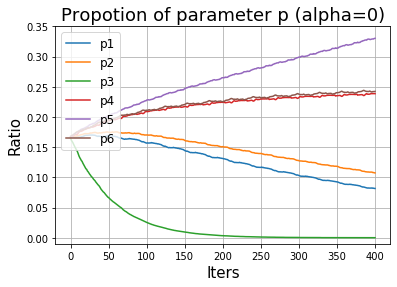

In [157]:
plt.plot(df_p["p1"],label="p1")
plt.plot(df_p["p2"],label="p2")
plt.plot(df_p["p3"],label="p3")
plt.plot(df_p["p4"],label="p4")
plt.plot(df_p["p5"],label="p5")
plt.plot(df_p["p6"],label="p6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Propotion of parameter p (alpha=0)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Ratio',fontdict={'fontsize':15,'fontweight':14})
plt.ylim((-0.01,0.35))
plt.savefig("plots/p_0.png")

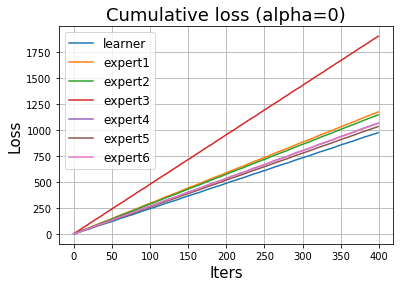

In [158]:
df_train = df_train.cumsum()

plt.plot(df_train["loss"],label="learner")
plt.plot(df_train["loss1"],label="expert1")
plt.plot(df_train["loss2"],label="expert2")
plt.plot(df_train["loss3"],label="expert3")
plt.plot(df_train["loss4"],label="expert4")
plt.plot(df_train["loss5"],label="expert5")
plt.plot(df_train["loss6"],label="expert6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Cumulative loss (alpha=0)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
plt.savefig("plots/loss_0.png")

### alpha = 0.001

In [159]:
filename = "results/train_0.001_0.01.txt"
df_train = data_preprocess_train(filename)
df_train

,epoch,loss,accu,loss1,loss2,loss3,loss4,loss5,loss6
0,1,2.687419,93.75,3.464102,3.162278,4.898979,3.741657,2.828427,2.828427
1,1,2.184151,95.31,2.645751,2.449490,4.582576,2.236068,2.645751,2.000000
2,1,3.038717,92.97,3.464102,3.316625,4.795832,3.162278,3.000000,3.162278
3,1,2.767534,91.41,3.464102,3.316625,4.795832,3.162278,3.316625,3.162278
4,1,2.496057,94.53,3.162278,3.000000,4.898979,2.449490,2.236068,2.449490
...,...,...,...,...,...,...,...,...,...
395,14,1.769037,96.09,2.236068,2.236068,4.358899,2.000000,2.000000,2.449490
396,14,2.699425,93.75,2.645751,3.000000,5.099020,3.162278,3.000000,3.162278
397,14,2.238577,94.53,3.316625,3.316625,5.291503,2.645751,2.645751,2.449490
398,14,3.033904,91.41,3.162278,3.316625,4.242641,3.316625,3.316625,3.316625


In [160]:
filename = "results/p_0.001_0.01.txt"
df_p = data_preprocess_p(filename)
df_p

,epoch,p1,p2,p3,p4,p5,p6
0,1,0.1667,0.1672,0.1643,0.1662,0.1678,0.1678
1,1,0.1669,0.1677,0.1614,0.1671,0.1679,0.1690
2,1,0.1669,0.1680,0.1592,0.1676,0.1687,0.1695
3,1,0.1670,0.1683,0.1572,0.1682,0.1691,0.1702
4,1,0.1667,0.1683,0.1543,0.1692,0.1704,0.1711
...,...,...,...,...,...,...,...
396,14,0.1002,0.1229,0.0093,0.2311,0.3037,0.2329
397,14,0.0997,0.1223,0.0093,0.2313,0.3039,0.2335
398,14,0.0999,0.1223,0.0094,0.2312,0.3037,0.2334
399,14,0.0996,0.1218,0.0093,0.2313,0.3045,0.2336


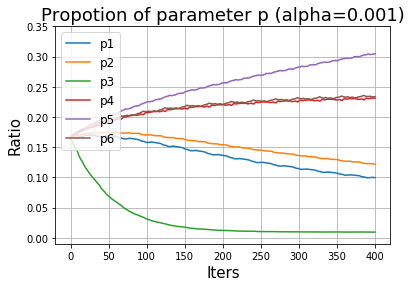

In [161]:
plt.plot(df_p["p1"],label="p1")
plt.plot(df_p["p2"],label="p2")
plt.plot(df_p["p3"],label="p3")
plt.plot(df_p["p4"],label="p4")
plt.plot(df_p["p5"],label="p5")
plt.plot(df_p["p6"],label="p6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Propotion of parameter p (alpha=0.001)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Ratio',fontdict={'fontsize':15,'fontweight':14})
plt.ylim((-0.01,0.35))
plt.savefig("plots/p_1e-3.png")

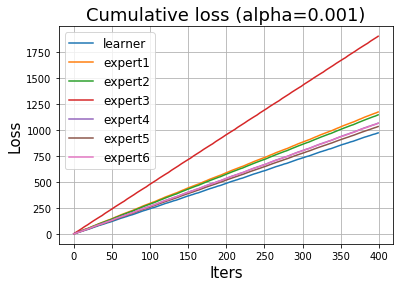

In [162]:
df_train = df_train.cumsum()

plt.plot(df_train["loss"],label="learner")
plt.plot(df_train["loss1"],label="expert1")
plt.plot(df_train["loss2"],label="expert2")
plt.plot(df_train["loss3"],label="expert3")
plt.plot(df_train["loss4"],label="expert4")
plt.plot(df_train["loss5"],label="expert5")
plt.plot(df_train["loss6"],label="expert6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Cumulative loss (alpha=0.001)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
plt.savefig("plots/loss_1e-3.png")

In [163]:
## alpha = 0.01

In [164]:
filename = "results/train_0.01_0.01.txt"
df_train = data_preprocess_train(filename)
df_train

,epoch,loss,accu,loss1,loss2,loss3,loss4,loss5,loss6
0,1,2.687419,93.75,3.464102,3.162278,4.898979,3.741657,2.828427,2.828427
1,1,2.184168,95.31,2.645751,2.449490,4.582576,2.236068,2.645751,2.000000
2,1,3.038757,92.97,3.464102,3.316625,4.795832,3.162278,3.000000,3.162278
3,1,2.767449,91.41,3.464102,3.316625,4.795832,3.162278,3.316625,3.162278
4,1,2.496310,94.53,3.162278,3.000000,4.898979,2.449490,2.236068,2.449490
...,...,...,...,...,...,...,...,...,...
395,14,1.742867,96.88,2.236068,2.236068,4.358899,2.000000,2.000000,2.449490
396,14,2.626749,92.97,2.645751,3.000000,5.099020,3.162278,3.000000,3.162278
397,14,2.280621,95.31,3.316625,3.316625,5.291503,2.645751,2.645751,2.449490
398,14,2.914026,90.62,3.162278,3.316625,4.242641,3.316625,3.316625,3.316625


In [165]:
filename = "results/p_0.01_0.01.txt"
df_p = data_preprocess_p(filename)
df_p

,epoch,p1,p2,p3,p4,p5,p6
0,1,0.1667,0.1672,0.1644,0.1662,0.1678,0.1678
1,1,0.1669,0.1677,0.1614,0.1671,0.1679,0.1690
2,1,0.1669,0.1679,0.1594,0.1676,0.1687,0.1695
3,1,0.1670,0.1683,0.1575,0.1682,0.1690,0.1701
4,1,0.1667,0.1683,0.1547,0.1691,0.1703,0.1710
...,...,...,...,...,...,...,...
396,14,0.1582,0.1667,0.0650,0.1984,0.2142,0.1975
397,14,0.1578,0.1662,0.0647,0.1987,0.2143,0.1982
398,14,0.1582,0.1663,0.0654,0.1984,0.2138,0.1979
399,14,0.1579,0.1659,0.0649,0.1986,0.2144,0.1982


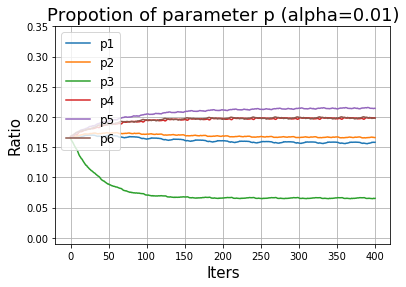

In [166]:
plt.plot(df_p["p1"],label="p1")
plt.plot(df_p["p2"],label="p2")
plt.plot(df_p["p3"],label="p3")
plt.plot(df_p["p4"],label="p4")
plt.plot(df_p["p5"],label="p5")
plt.plot(df_p["p6"],label="p6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Propotion of parameter p (alpha=0.01)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Ratio',fontdict={'fontsize':15,'fontweight':14})
plt.ylim((-0.01,0.35))
plt.savefig("plots/p_1e-2.png")

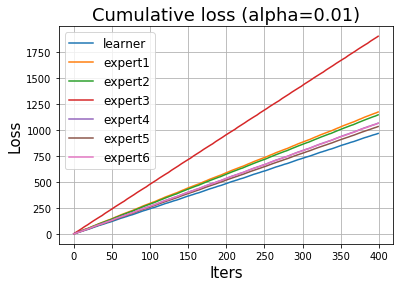

In [167]:
df_train = df_train.cumsum()

plt.plot(df_train["loss"],label="learner")
plt.plot(df_train["loss1"],label="expert1")
plt.plot(df_train["loss2"],label="expert2")
plt.plot(df_train["loss3"],label="expert3")
plt.plot(df_train["loss4"],label="expert4")
plt.plot(df_train["loss5"],label="expert5")
plt.plot(df_train["loss6"],label="expert6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Cumulative loss (alpha=0.01)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
plt.savefig("plots/loss_1e-2.png")

In [168]:
## alpha = 0.05

In [169]:
filename = "results/train_0.05_0.01.txt"
df_train = data_preprocess_train(filename)
df_train

,epoch,loss,accu,loss1,loss2,loss3,loss4,loss5,loss6
0,1,2.687419,93.75,3.464102,3.162278,4.898979,3.741657,2.828427,2.828427
1,1,2.184247,95.31,2.645751,2.449490,4.582576,2.236068,2.645751,2.000000
2,1,3.038932,92.97,3.464102,3.316625,4.795832,3.162278,3.000000,3.162278
3,1,2.767092,91.41,3.464102,3.316625,4.795832,3.162278,3.316625,3.162278
4,1,2.497374,94.53,3.162278,3.000000,4.898979,2.449490,2.236068,2.449490
...,...,...,...,...,...,...,...,...,...
395,14,1.769675,96.88,2.236068,2.236068,4.358899,2.000000,2.000000,2.449490
396,14,2.608684,92.97,2.645751,3.000000,5.099020,3.162278,3.000000,3.162278
397,14,2.338758,95.31,3.316625,3.316625,5.291503,2.645751,2.645751,2.449490
398,14,2.842800,90.62,3.162278,3.316625,4.242641,3.316625,3.316625,3.316625


In [170]:
filename = "results/p_0.05_0.01.txt"
df_p = data_preprocess_p(filename)
df_p

,epoch,p1,p2,p3,p4,p5,p6
0,1,0.1667,0.1672,0.1645,0.1663,0.1677,0.1677
1,1,0.1669,0.1676,0.1618,0.1671,0.1678,0.1688
2,1,0.1669,0.1678,0.1601,0.1676,0.1685,0.1692
3,1,0.1669,0.1681,0.1586,0.1681,0.1687,0.1696
4,1,0.1667,0.1680,0.1563,0.1689,0.1698,0.1703
...,...,...,...,...,...,...,...
396,14,0.1697,0.1710,0.1300,0.1763,0.1779,0.1751
397,14,0.1693,0.1705,0.1296,0.1766,0.1781,0.1758
398,14,0.1695,0.1705,0.1309,0.1762,0.1776,0.1754
399,14,0.1693,0.1702,0.1301,0.1765,0.1782,0.1757


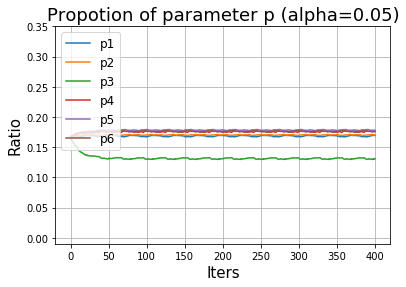

In [171]:
plt.plot(df_p["p1"],label="p1")
plt.plot(df_p["p2"],label="p2")
plt.plot(df_p["p3"],label="p3")
plt.plot(df_p["p4"],label="p4")
plt.plot(df_p["p5"],label="p5")
plt.plot(df_p["p6"],label="p6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Propotion of parameter p (alpha=0.05)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Ratio',fontdict={'fontsize':15,'fontweight':14})
plt.ylim((-0.01,0.35))
plt.savefig("plots/p_5e-2.png")

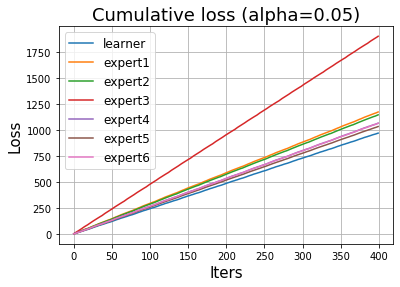

In [172]:
df_train = df_train.cumsum()

plt.plot(df_train["loss"],label="learner")
plt.plot(df_train["loss1"],label="expert1")
plt.plot(df_train["loss2"],label="expert2")
plt.plot(df_train["loss3"],label="expert3")
plt.plot(df_train["loss4"],label="expert4")
plt.plot(df_train["loss5"],label="expert5")
plt.plot(df_train["loss6"],label="expert6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Cumulative loss (alpha=0.05)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
plt.savefig("plots/loss_5e-2.png")

In [173]:
### alpha = 0.1

In [174]:
filename = "results/train_0.1_0.01.txt"
df_train = data_preprocess_train(filename)
df_train

,epoch,loss,accu,loss1,loss2,loss3,loss4,loss5,loss6
0,1,2.687419,93.75,3.464102,3.162278,4.898979,3.741657,2.828427,2.828427
1,1,2.184346,95.31,2.645751,2.449490,4.582576,2.236068,2.645751,2.000000
2,1,3.039143,92.97,3.464102,3.316625,4.795832,3.162278,3.000000,3.162278
3,1,2.766683,91.41,3.464102,3.316625,4.795832,3.162278,3.316625,3.162278
4,1,2.498572,94.53,3.162278,3.000000,4.898979,2.449490,2.236068,2.449490
...,...,...,...,...,...,...,...,...,...
395,14,1.783634,96.88,2.236068,2.236068,4.358899,2.000000,2.000000,2.449490
396,14,2.611868,92.97,2.645751,3.000000,5.099020,3.162278,3.000000,3.162278
397,14,2.357678,95.31,3.316625,3.316625,5.291503,2.645751,2.645751,2.449490
398,14,2.830103,90.62,3.162278,3.316625,4.242641,3.316625,3.316625,3.316625


In [175]:
filename = "results/p_0.1_0.01.txt"
df_p = data_preprocess_p(filename)
df_p

,epoch,p1,p2,p3,p4,p5,p6
0,1,0.1667,0.1671,0.1646,0.1663,0.1676,0.1676
1,1,0.1668,0.1675,0.1622,0.1671,0.1677,0.1686
2,1,0.1668,0.1677,0.1609,0.1675,0.1683,0.1689
3,1,0.1669,0.1678,0.1598,0.1679,0.1684,0.1691
4,1,0.1667,0.1677,0.1580,0.1686,0.1693,0.1697
...,...,...,...,...,...,...,...
396,14,0.1693,0.1695,0.1472,0.1716,0.1720,0.1704
397,14,0.1688,0.1690,0.1469,0.1719,0.1722,0.1712
398,14,0.1690,0.1689,0.1482,0.1714,0.1717,0.1708
399,14,0.1687,0.1687,0.1474,0.1717,0.1723,0.1712


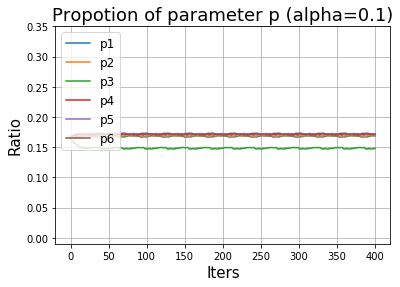

In [176]:
plt.plot(df_p["p1"],label="p1")
plt.plot(df_p["p2"],label="p2")
plt.plot(df_p["p3"],label="p3")
plt.plot(df_p["p4"],label="p4")
plt.plot(df_p["p5"],label="p5")
plt.plot(df_p["p6"],label="p6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Propotion of parameter p (alpha=0.1)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Ratio',fontdict={'fontsize':15,'fontweight':14})
plt.ylim((-0.01,0.35))
plt.savefig("plots/p_1e-1.png")

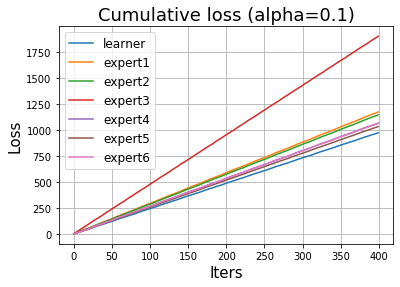

In [177]:
df_train = df_train.cumsum()

plt.plot(df_train["loss"],label="learner")
plt.plot(df_train["loss1"],label="expert1")
plt.plot(df_train["loss2"],label="expert2")
plt.plot(df_train["loss3"],label="expert3")
plt.plot(df_train["loss4"],label="expert4")
plt.plot(df_train["loss5"],label="expert5")
plt.plot(df_train["loss6"],label="expert6")
plt.legend(prop={'size': 12}, loc='upper left')
plt.grid()
plt.title('Cumulative loss (alpha=0.1)', fontdict={'fontsize':18,'fontweight':16})
plt.xlabel('Iters',fontdict={'fontsize':15,'fontweight':14})
plt.ylabel('Loss',fontdict={'fontsize':15,'fontweight':14})
plt.savefig("plots/loss_1e-1.png")